In [ ]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

len(words)

min(len(w) for w in words)

max(len(w) for w in words)

In [6]:
for w in words[:1]:
    for ch1, ch2 in zip(w, w[1:]):
        print(ch1, ch2)

e m
m m
m a


In [7]:
# How zip works 
w 

'emma'

In [8]:
w[1:]

'mma'

In [9]:
list(zip(w, w[1:])) 
# zip returns a list of tuples


[('e', 'm'), ('m', 'm'), ('m', 'a')]

In [10]:
# another example that is makes it clear to see what zip does 

list (zip(range(5), range(100)))

#it take value from first variable and matches its position with second variable and returns a tuple

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]

In [3]:
# we are keep track of what letter starts a name and what letter ends a name and bigram keep track of letter that comes in between
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>'] # creating a list with start and end tokens
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2) # creating a tuple with two letters
        b[bigram] = b.get(bigram, 0) + 1 # adding the tuple to the dictionary and incrementing the value by 1
        # print(ch1, ch2)

In [4]:
sorted(b.items(), key = lambda kv: kv[1], reverse = True)


[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [1]:
import torch

In [2]:
a = torch.zeros((3, 5), dtype = torch.int32)
a.dtype

torch.int32

In [3]:
words = open('names.txt', 'r').read().splitlines()


In [4]:
N = torch.zeros((28, 28), dtype = torch.int32)

In [5]:
chars = sorted(list(set(''.join(words)))) # set removes duplicates keeps alphabets, convert the set into list and sort it
stoi = {s: i for i, s in enumerate(chars)} # creating a dictionary with characters as keys and index as values
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [6]:
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        N[i1, i2] += 1

In [7]:
itos = {i: s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

In [8]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

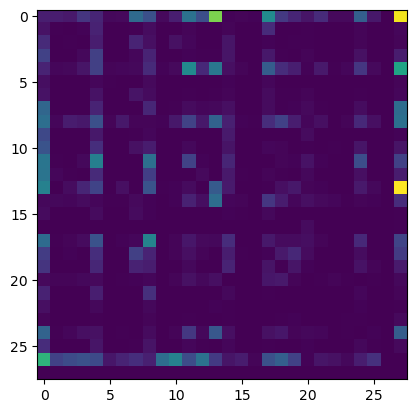

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)


(-0.5, 27.5, 27.5, -0.5)

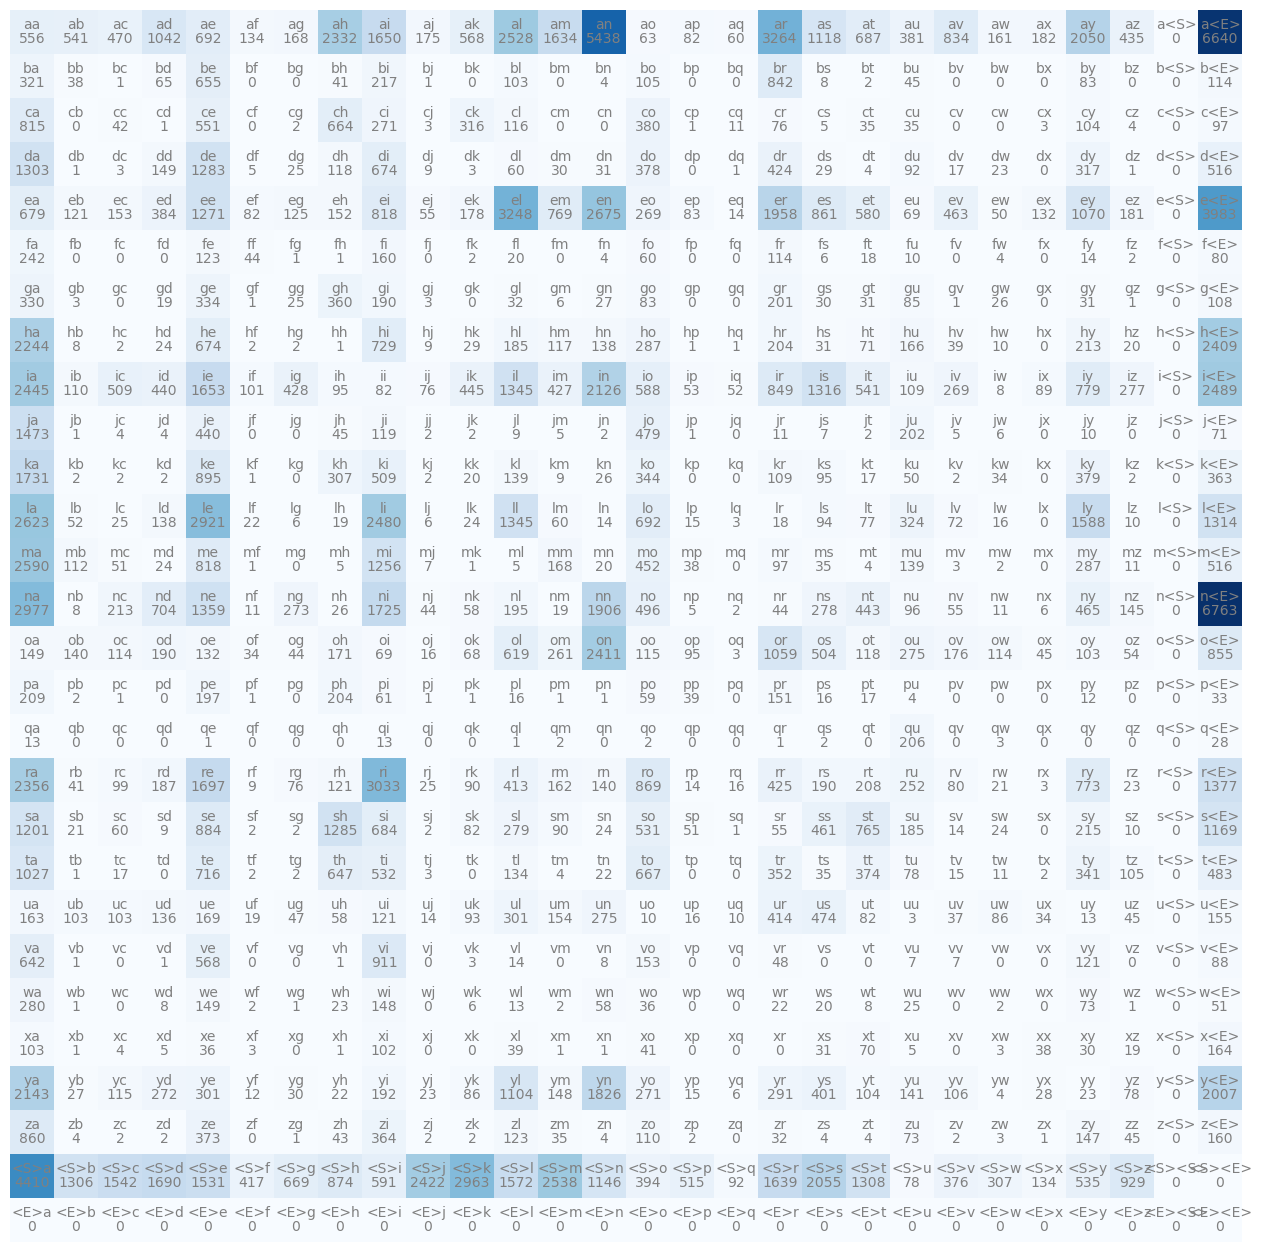

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = 'Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray' )
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray' )
plt.axis('off')


In [16]:
import torch
N = torch.zeros((27, 27), dtype = torch.int32)
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        N[i1, i2] += 1

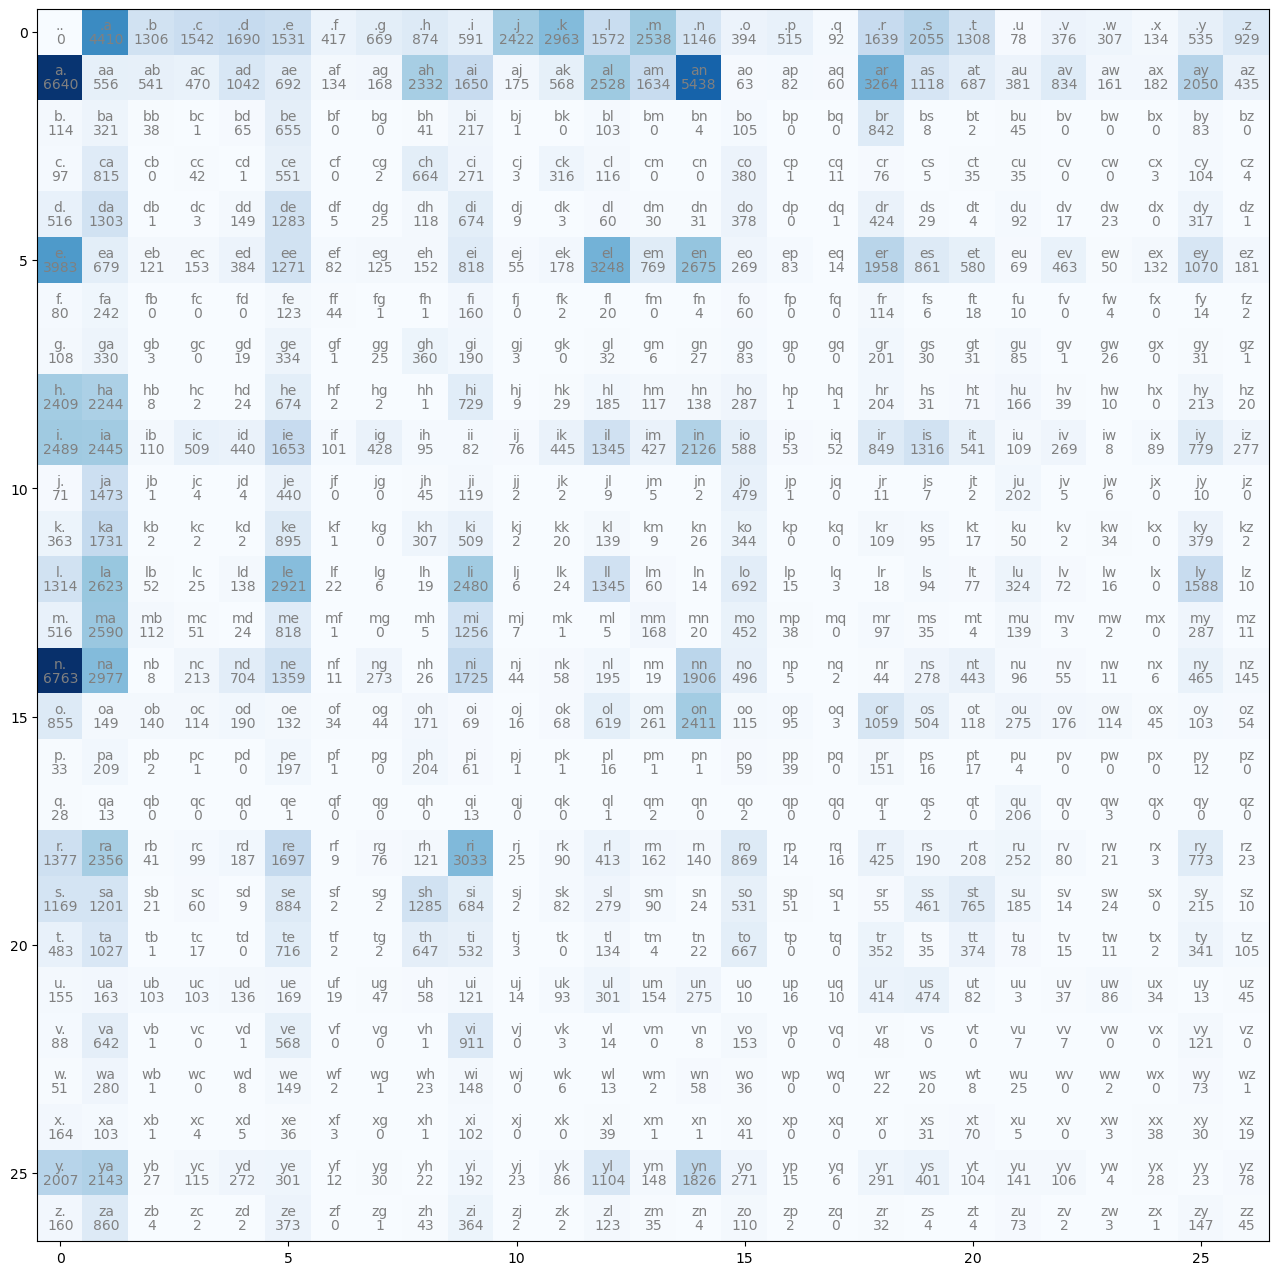

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (16, 16))
plt.imshow(N, cmap = 'Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha = 'center', va = 'bottom', color = 'gray' )
        plt.text(j, i, N[i, j].item(), ha = 'center', va = 'top', color = 'gray' )

In [18]:
N[0] # row or N[0,:] and for N[:, 0] # column

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [19]:
p = N[0].float()
p = p / p.sum() # p is a probability distribution
p 

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [21]:
# Multinomial distribution = you give me probability distribution; I will give you a sample (integers) from that distribution

# Generator is a way to get same result every time you run the code; for you and me

g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator = g)
p = p / p.sum()
p

tensor([0.6064, 0.3033, 0.0903])

In [22]:

ix = torch.multinomial(p, num_samples=1, replacement = True, generator = g).item()
itos[ix]

'a'

In [23]:
torch.multinomial(p, num_samples = 20, replacement = True, generator = g)

tensor([1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0])

In [26]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[ix]

'a'

In [31]:
p.shape

torch.Size([27])

In [34]:
P = N.float()
P.shape
P.sum(0, keepdim = True) # sum of each column; kept row as 1
P.sum(0, keepdim = True).shape

torch.Size([1, 27])

In [36]:
P.sum(1, keepdim = True) # sum of each row; made it into column vector
#

tensor([[32033.],
        [33885.],
        [ 2645.],
        [ 3532.],
        [ 5496.],
        [20423.],
        [  905.],
        [ 1927.],
        [ 7616.],
        [17701.],
        [ 2900.],
        [ 5040.],
        [13958.],
        [ 6642.],
        [18327.],
        [ 7934.],
        [ 1026.],
        [  272.],
        [12700.],
        [ 8106.],
        [ 5570.],
        [ 3135.],
        [ 2573.],
        [  929.],
        [  697.],
        [ 9776.],
        [ 2398.]])

In [37]:
P = N.float()
P = P / P.sum(1, keepdim = True) # Broadcast operation is allowed
# How will you divide
# 27 x 27 matrix by 27 x 1 matrix
# Refer: Broadcasting in PyTorch
# What broadcasting does is it take the column vector and copies it 27 times to match 27 x 27 matrix and then divides and does elementwise division. This is what we want. We want the relative probability of each bigram with respect to that row. That is what we did in the sample calculation that we did above. 


In [39]:
# Check the see that probability distribution is correct
P[0].sum() # sum the rows and see that it is 1

tensor(1.)

In [40]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix].float()
        #p = N[ix].float()
        #p = p / p.sum()
        #p = torch.ones(27) / 27 # uniform distribution
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print (''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [53]:
P = (N + 1).float() # Laplace smoothing
P = P / P.sum(1, keepdim = True) # Broadcast operation is allowed
#P /= P.sum(0, keepdim = True) # Inplace operation
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print (''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.
h.
br.
a.
jayn.
ilemannariaenien.
be.
f.
akiinela.
trttanakeroruceyaaxatona.
lamoynayrkiedengin.


In [ ]:
# GOAL: Finding a single number to express the loss fuction of the model
# max likelihood estimation is the loss function, which is just the product of all the probabilities
# because the prob is too small, we we multiply them, we get a very small number
# so we take the log of the product of the probabilities
# log(a*b*c) = log(a) + log(b) + log(c)
# This give -ve number, which is not good to work with in optimization
# So we take -ve of the log of the product of the probabilities
# negative log likelihood is still a large number, so we take the average of the negative log likelihood

#GOAL: maximize the likelihood of the data w.r.t model parameters
# equivalent to maximizing the log likelihood (because log is manotonic increasing)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood

In [ ]:
# if i use balaji or balajq; jq you will -inf, because jq has zero occurence and when we take log of zero, we get -inf so to fix this we will smooth the data by adding 1 to each element of the matrix

In [54]:
log_likelihood = 0.0
n = 0
#for w in words[:3]:
for w in ["balajq"]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        prob = P[i1, i2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print (f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print (f'log likelihood: {log_likelihood:.4f}')
nll = -log_likelihood
print (f'negative log likelihood: {nll:.4f}')
print (f'average negative log likelihood: {nll/n:.4f}')

.b: 0.0408 -3.1999
ba: 0.1205 -2.1160
al: 0.0746 -2.5959
la: 0.1876 -1.6733
aj: 0.0052 -5.2610
jq: 0.0003 -7.9817
q.: 0.0970 -2.3331
log likelihood: -25.1611
negative log likelihood: 25.1611
average negative log likelihood: 3.5944


In [61]:
# create the training set of bigrams (x, y))
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [59]:
xs # x is the input; for xs - 0 (.) input we need to map to ys - 5(e) output
# similarly for xs - 5(e) input we need to map to ys - 0(13) output

tensor([ 0,  5, 13, 13,  1])

In [60]:
ys

tensor([ 5, 13, 13,  1,  0])

In [ ]:
# in nueral network we cannot input value 5,13... which are index representation of the characters. We cannot multiply index value like, 5 and 13 with weights. So we need to convert them into 1 and 0, like making 1 for position 13 and making the rest 0 and feed that vector as input to the neural network. This is called one hot encoding

In [67]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes = 27).float()
# one hot only support int64; does not support float. But we need float to make this as input to nueron network. So we need to convert it to float
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [68]:
xenc.shape

torch.Size([5, 27])

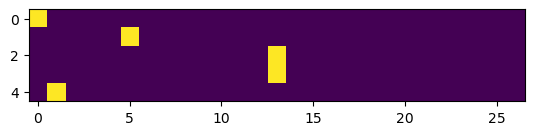

In [65]:
plt.imshow(xenc)

In [69]:
xenc.dtype

torch.float32

In [71]:
W = torch.randn(27, 1)
xenc @ W # matrix multiplication
# 5 x 27 matrix and 27 x 1 matrix = 5 x 1 matrix

tensor([[0.5160],
        [0.2794],
        [0.7390],
        [0.7390],
        [0.4821]])

In [73]:
W = torch.randn(27, 27)
xenc @ W # matrix multiplication
# 5 x 27 matrix and 27 x 27 matrix = 5 x 27 matrix
# of the 27 neurons, that we created, what is firing rate for each neuron
(xenc @ W)[3,13] # this give the firing rate of 13th neuron for 3rd input 13 column of W 
# What this matrix multiplication is doing is, it is taking all the 27 neurons in the layer and multiplying it the 2 input  

tensor(1.7464)

In [74]:
(xenc[3] * W[:,13]).sum() # this is the same as above

tensor(1.7464)

In [ ]:
# So, what these numbers mean... 
# These output number are logorithm of bigram counts... = logits (log-count)
# So to get back the bigram counts, we need to take the exponent of these numbers  = exp(logits) = bigram counts = N matrix

In [80]:
logits = xenc @ W
counts = logits.exp()
prob = counts / counts.sum(1, keepdim = True) # normalize the row to get the probability

In [81]:
prob.shape

torch.Size([5, 27])

In [82]:
prob[0].sum() # sum of the row is 1

tensor(1.)

In [ ]:
# Summary 
# 1. xs and ys are bigrams of the word balaji or emma that is input we are feeding to the model 
# 2. Generate W - Randomly initialize 27 neurons, each neuron receives 27 inputs from the 27 characters 
# 3. Create a forward pass: 
#    a. xenc - one hot encoding of the input 5 bigram array becomes 5 x 27 matrix
#   b. logits - Multiply the first layer W with input to get logits 
#   c. counts - Take the exponent of the logits to get the fake-counts
#   d. prob - Normalize the counts to get the probability
#      Note: Counts & prob are call softmax activation function
#   e. All these layers are differentiable and we can backpropagate
#      Note: We can backpropagate multiplication, exponentiation and division as well


In [83]:
xs


tensor([ 0,  5, 13, 13,  1])

In [119]:
ys

tensor([ 5, 13, 13,  1,  0])

In [91]:
#randomly initialize the weights of 27 neurons. Each neuron receives 27 inputs from the 27 characters
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn(27, 27, generator = g)

In [92]:
xenc = F.one_hot(xs, num_classes = 27).float() # one hot encoding of the input
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, fake counts, equivalent to N matrix
probs = counts / counts.sum(1, keepdim = True) # probabilities for next character 

In [89]:
probs.shape

torch.Size([5, 27])

In [93]:
nlls = torch.zeros(5)
for i in range(5):
    # i-th bigram:
    x = xs[i].item() # input character index - e - 5
    y = ys[i].item() # label character index - m - 13
    print ('-------------------')
    print (f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
    print ('input to the neural net:', x)
    print ('output probabilities from the neural net:', probs[i])
    print ( 'label (actual next character):', y)
    p = probs[i, y] # probability of the actual next character
    print ('probability assigned by the net to the correct character:', p.item())
    logp = torch.log(p) # log probability of the actual next character
    print ('log likelihood :', logp.item())
    nll = -logp # negative log likelihood
    print ('negative log likelihood:', nll.item())
    nlls[i] = nll

print ("=====================")
print ('average negative log likelihood:', nlls.mean().item())


-------------------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0049, 0.0959, 0.0281, 0.0703, 0.0961, 0.0573, 0.0241, 0.0135, 0.0093,
        0.1416, 0.0225, 0.0217, 0.0513, 0.0106, 0.0097, 0.0291, 0.0229, 0.0273,
        0.0325, 0.0275, 0.0446, 0.0501, 0.0214, 0.0093, 0.0120, 0.0354, 0.0310])
label (actual next character): 5
probability assigned by the net to the correct character: 0.05734505504369736
log likelihood : -2.858668565750122
negative log likelihood: 2.858668565750122
-------------------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0426, 0.0113, 0.0266, 0.0507, 0.2370, 0.0580, 0.0421, 0.0094, 0.0136,
        0.0297, 0.0044, 0.0782, 0.1028, 0.0146, 0.0172, 0.0288, 0.0263, 0.0319,
        0.0248, 0.0210, 0.0063, 0.0057, 0.0309, 0.0269, 0.0298, 0.0089, 0.0205])
label (actual next character): 13
probability assigned by the net to the correc

In [ ]:
#---------- Optimization yay... 

In [94]:
xs

tensor([ 0,  5, 13, 13,  1])

In [95]:
ys

tensor([ 5, 13, 13,  1,  0])

In [105]:
#randomly initialize the weights of 27 neurons. Each neuron receives 27 inputs from the 27 characters
g = torch.Generator().manual_seed(2147483647 + 1)
W = torch.randn(27, 27, generator = g, requires_grad = True)

In [115]:
# Forward Pass
xenc = F.one_hot(xs, num_classes = 27).float() # one hot encoding of the input
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, fake counts, equivalent to N matrix
probs = counts / counts.sum(1, keepdim = True) # probabilities for next character 
loss = -probs[torch.arange(5), ys].log().mean()

In [ ]:
# Now we have to calculate the loss; Not mean squared error, but negative log likelihood, since this is classification problem not a regression problem



In [98]:
probs.shape

torch.Size([5, 27])

In [99]:
# we are interested in the probablity of ys 0, 1, 2, 3, 4 of probs
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0573),
 tensor(0.0146),
 tensor(0.0321),
 tensor(0.0235),
 tensor(0.0737))

In [101]:
# convert tenson into vector
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [102]:
probs[torch.arange(5), ys]

tensor([0.0573, 0.0146, 0.0321, 0.0235, 0.0737])

In [103]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

tensor(3.3771)

In [116]:
# Backward Pass
W.grad = None # clear the gradients; setting to zero 
loss.backward() # calculate the gradients

In [117]:
# update the weights based on backpropagation
W.data += 0.1 * W.grad

In [118]:
print (loss.item()) # loss before the update tensor(3.3771)

3.417764186859131


In [128]:
# create the training set of bigrams (x, y))
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        #print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement() # number of elements in the tensor
print (f'number of bigrams: {num}')

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn(27, 27, generator = g, requires_grad = True)

number of bigrams: 228146


In [130]:
(W**2).mean()

tensor(1.6865, grad_fn=<MeanBackward0>)

In [133]:
# gradient descent

for k in range(50):

    # forward pass
    xenc = F.one_hot(xs, num_classes = 27).float() # one hot encoding of the input
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, fake counts, equivalent to N matrix
    probs = counts / counts.sum(1, keepdim = True) # probabilities for next character 
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean() # smoothness regularization
    print (f'loss: {loss.item()}')

    # backward pass
    W.grad = None # clear the gradients; setting to zero
    loss.backward() # calculate the gradients

    # update the weights based on backpropagation
    W.data += -100 * W.grad

loss: 2.553204298019409
loss: 2.528364896774292
loss: 2.5323903560638428
loss: 2.5283122062683105
loss: 2.5451033115386963
loss: 2.5216259956359863
loss: 2.5262279510498047
loss: 2.523036241531372
loss: 2.541228771209717
loss: 2.5176994800567627
loss: 2.522433042526245
loss: 2.5197649002075195
loss: 2.538686752319336
loss: 2.5149905681610107
loss: 2.519737958908081
loss: 2.5174753665924072
loss: 2.536846399307251
loss: 2.513012170791626
loss: 2.51773738861084
loss: 2.5157835483551025
loss: 2.535456418991089
loss: 2.511518716812134
loss: 2.5162179470062256
loss: 2.5144894123077393
loss: 2.5343716144561768
loss: 2.510361909866333
loss: 2.5150418281555176
loss: 2.513471841812134
loss: 2.533503532409668
loss: 2.5094456672668457
loss: 2.5141148567199707
loss: 2.5126562118530273
loss: 2.5327954292297363
loss: 2.5087056159973145
loss: 2.5133724212646484
loss: 2.5119917392730713
loss: 2.5322086811065674
loss: 2.5080995559692383
loss: 2.512768030166626
loss: 2.5114426612854004
loss: 2.531717777